<a href="https://colab.research.google.com/github/LxMera/Deep-Learning---denoising-rs-fMRI/blob/master/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import os.path as path
if path.exists('Data'):   
    print ('The folder already exists')
else:
    !wget -nc https://www.dropbox.com/s/ufwmggstfj0xr8c/DatosXYZ.mat?dl=1
    !wget -nc https://www.dropbox.com/s/9vfa4ehuhu76jjl/Data.zip?dl=1
    !unzip Data.zip?dl=1 | awk 'BEGIN { ORS = "" } { print "|" }'
    !rm -r Data.zip?dl=1
    !mv DatosXYZ.mat?dl=1 Data/DatosXYZ.mat

The folder already exists


In [0]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

### Shape

In [27]:
matT = scipy.io.loadmat('Data/DatosT.mat')
mat = scipy.io.loadmat('Data/DatosXYZ.mat')
etique = scipy.io.loadmat('Data/LabelFix.mat')

Datos=mat['Datos_C']
DatosX=matT['Datos_C']
Etiq=np.transpose(etique['series'])[:,0]

print(np.shape(DatosX))
print(np.shape(Datos))
print(np.shape(Etiq))

(22877, 27)
(22877, 27)
(22877,)


### Standardization

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
DatosN=scaler.fit_transform(Datos)
DatosT=scaler.fit_transform(DatosX)

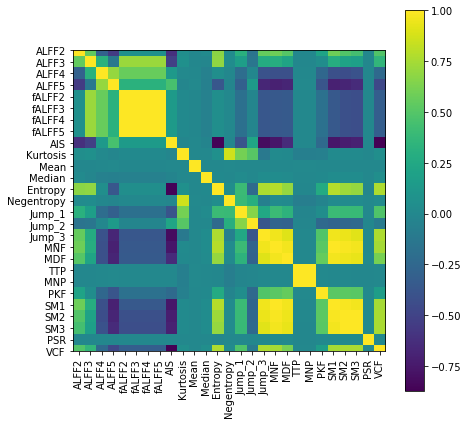

In [29]:
lab=['ALFF2','ALFF3','ALFF4','ALFF5','fALFF2','fALFF3','fALFF4','fALFF5','AIS','Kurtosis','Mean','Median','Entropy','Negentropy','Jump_1','Jump_2','Jump_3','MNF','MDF','TTP','MNP','PKF','SM1','SM2','SM3','PSR','VCF']
tic=np.arange(27)
corr=np.corrcoef(np.transpose(DatosT))
plt.figure(figsize=(7,7))
plt.imshow(corr)
plt.xticks(tic, lab, rotation='vertical')
plt.yticks(tic, lab)
plt.colorbar()

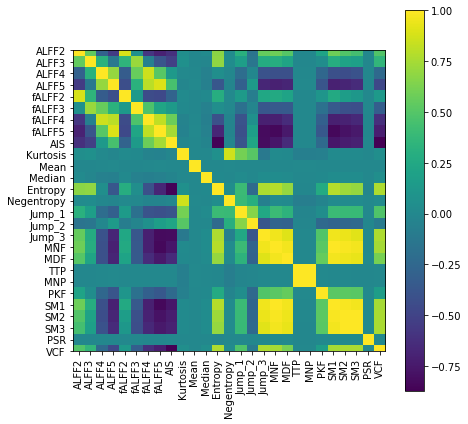

In [30]:
corr=np.corrcoef(np.transpose(DatosN))
plt.figure(figsize=(7,7))
plt.imshow(corr)
plt.xticks(tic, lab, rotation='vertical')
plt.yticks(tic, lab)
plt.colorbar()

correlation


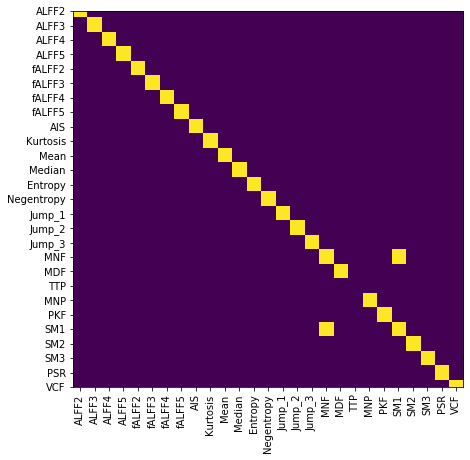

In [31]:
plt.figure(figsize=(7,7))
plt.imshow(corr==1)
plt.xticks(tic, lab, rotation='vertical')
plt.yticks(tic, lab)
print('correlation')

#Principal components analysis

In [0]:
from sklearn.decomposition import FastICA, PCA
pca = PCA(n_components=27)
Datos2 = pca.fit_transform(DatosN)

In [33]:
cum=np.cumsum(pca.explained_variance_ratio_)*100
print(cum)

[ 40.77221901  51.0903432   61.21239903  68.56946029  75.47267248
  79.64821013  83.35320565  87.04914419  90.7203238   93.56480525
  95.72958198  97.1445205   98.09694365  98.55430996  98.9721006
  99.28260797  99.5480142   99.69394964  99.8056639   99.88152125
  99.93839795  99.96631419  99.98608421  99.99954083 100.
 100.         100.        ]


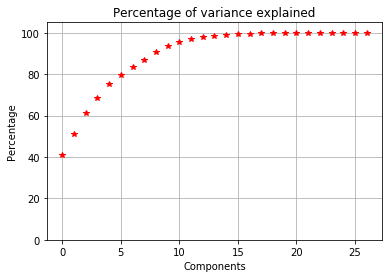

In [34]:
plt.plot(cum, '*r')
plt.title('Percentage of variance explained')
plt.xlabel('Components')
plt.ylabel('Percentage')
plt.ylim((0, 105))
plt.grid()

In [35]:
np.shape(Datos2)

(22877, 27)